In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import WEIRDOFunctions
%matplotlib inline

In [2]:
PoreBounds = [ 3000, 1194, 475, 189, 75, 30, 8.6, 2.47, 0.707, 0.202, 0.0005 ]

BoundPSImm =  np.divide(-30000,PoreBounds)
BoundPSIcm =  np.divide(-3000,PoreBounds)

In [26]:
BoundPSImm

array([ -1.00000000e+01,  -2.51256281e+01,  -6.31578947e+01,
        -1.58730159e+02,  -4.00000000e+02,  -1.00000000e+03,
        -3.48837209e+03,  -1.21457490e+04,  -4.24328147e+04,
        -1.48514851e+05,  -6.00000000e+07])

In [3]:
BoundrySuction = [1,1,1.4,1.4,1.8,1.8,2.2,2.2,2.6,2.6,3,3,3.54,3.54,4.085,4.085,4.6275,4.6275,5.17,5.17,7.77,7.77]
BoundryMarkers = [-0.1,10000,10000,-0.1,-0.1,10000,10000,-0.1,-0.1,10000,10000,-0.1,-0.1,10000,10000,-0.1,-0.1,10000,10000,-0.1,-0.1,10000]

SAT = 0.57
DUL = 0.37
LL15 = 0.15
psibub = -60
Cflow = 4e-12
Xflow = 4

TestFrame = WEIRDOFunctions.SorptionFrame(BoundPSImm,SAT,DUL,LL15,psibub,Cflow,Xflow)

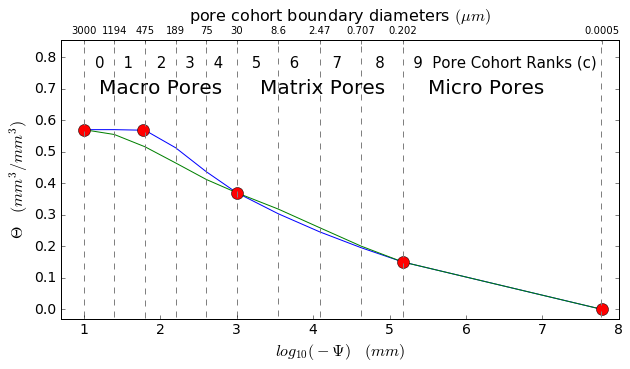

In [4]:
ymax = max(WEIRDOFunctions.ThetaCurve_mm_5pt(BoundPSImm,SAT,DUL,LL15,psibub))*1.5
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.plot(np.log10(-BoundPSImm),WEIRDOFunctions.ThetaCurve_mm_5pt(BoundPSImm,SAT,DUL,LL15,psibub))
ax1.plot(np.log10(-BoundPSIcm)+1,WEIRDOFunctions.ThetaCurve_mm_4pt(BoundPSImm,SAT,DUL,LL15))
ax1.plot(np.log10([ 10, -psibub, 1000, 148510, 60000000]),[SAT,SAT,DUL,LL15,0],'o',color = 'red',markersize=12)
ax1.plot(BoundrySuction,BoundryMarkers,'--',color='grey')
ax1.set_xlim(.70,8)
ax1.set_ylim(-.03,ymax)
ax1.set_xlabel(r'$log_{10}(-\Psi) \quad (mm)$',fontsize=16)
ax1.set_ylabel(r'$\Theta \quad (mm^3/mm^3)$',fontsize=16)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(np.log10(-BoundPSImm))
ax2.set_xticklabels(PoreBounds)
ax2.set_xlabel(r'pore cohort boundary diameters $(\mu m)$',fontsize=16)
ax1.tick_params(labelsize = 14)
plt.text(1.2,ymax*0.8,'Macro Pores',fontsize=20)
plt.text(3.3,ymax*0.8,'Matrix Pores',fontsize=20)
plt.text(5.5,ymax*0.8,'Micro Pores',fontsize=20)
plt.text(1.15,ymax*0.9,'0    1     2    3    4      5      6       7       8      9  Pore Cohort Ranks (c)',fontsize=15)

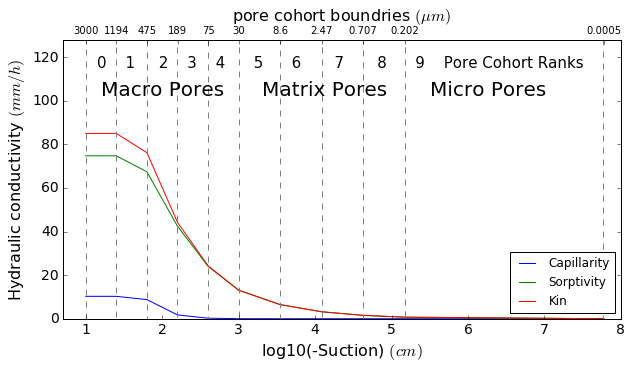

In [5]:
ymax = round(TestFrame.ix[:,'Cumkin'].max()*1.5)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.plot(np.log10(-TestFrame.ix[:,'PsiUpper']),TestFrame.ix[:,'CumCapil'],label = 'Capillarity')
ax1.plot(np.log10(-TestFrame.ix[:,'PsiUpper']),TestFrame.ix[:,'CumSorp'],label = 'Sorptivity')
ax1.plot(np.log10(-TestFrame.ix[:,'PsiUpper']),TestFrame.ix[:,'Cumkin'],label = 'Kin')
ax1.plot(BoundrySuction,BoundryMarkers,'--',color='grey')
ax1.set_xlim(.70,8)
ax1.set_ylim(-.03,ymax)
ax1.set_xlabel(r'log10(-Suction) $(cm)$',fontsize=16)
ax1.set_ylabel(r'Hydraulic conductivity $(mm/h)$',fontsize=16)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(np.log10(-BoundPSImm))
ax2.set_xticklabels(PoreBounds)
ax2.set_xlabel(r'pore cohort boundries $(\mu m)$',fontsize=16)
ax1.tick_params(labelsize = 14)
plt.text(1.2,ymax*0.8,'Macro Pores',fontsize=20)
plt.text(3.3,ymax*0.8,'Matrix Pores',fontsize=20)
plt.text(5.5,ymax*0.8,'Micro Pores',fontsize=20)
plt.text(1.15,ymax*0.9,'0    1     2    3    4      5      6       7       8      9    Pore Cohort Ranks',fontsize=15)
ax1.legend(loc=4)

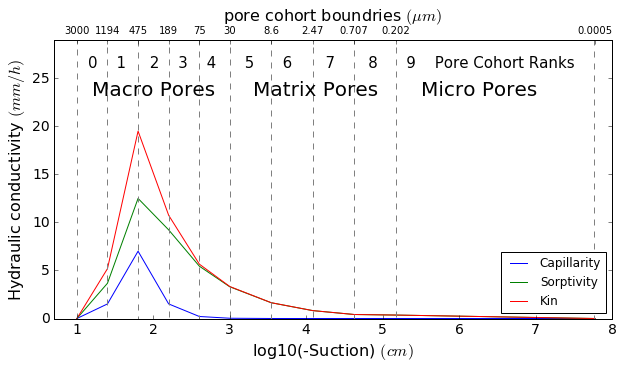

In [6]:
ymax = round(TestFrame.ix[:,'Kin'].max()*1.5)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.plot(np.log10(-TestFrame.ix[:,'PsiUpper']),TestFrame.ix[:,'PoreCapillarity'],label = 'Capillarity')
ax1.plot(np.log10(-TestFrame.ix[:,'PsiUpper']),TestFrame.ix[:,'Sorption'],label = 'Sorptivity')
ax1.plot(np.log10(-TestFrame.ix[:,'PsiUpper']),TestFrame.ix[:,'Kin'],label = 'Kin')
ax1.plot(BoundrySuction,BoundryMarkers,'--',color='grey')
ax1.set_xlim(.70,8)
ax1.set_ylim(-.03,ymax)
ax1.set_xlabel(r'log10(-Suction) $(cm)$',fontsize=16)
ax1.set_ylabel(r'Hydraulic conductivity $(mm/h)$',fontsize=16)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(np.log10(-BoundPSImm))
ax2.set_xticklabels(PoreBounds)
ax2.set_xlabel(r'pore cohort boundries $(\mu m)$',fontsize=16)
ax1.tick_params(labelsize = 14)
plt.text(1.2,ymax*0.8,'Macro Pores',fontsize=20)
plt.text(3.3,ymax*0.8,'Matrix Pores',fontsize=20)
plt.text(5.5,ymax*0.8,'Micro Pores',fontsize=20)
plt.text(1.15,ymax*0.9,'0    1     2    3    4      5      6       7       8      9    Pore Cohort Ranks',fontsize=15)
ax1.legend(loc=4)

In [7]:
Poris = WEIRDOFunctions.SorptionFrame(BoundPSImm,0.45,.3,.08,-100,6e-11,3.5)
Intermediate = WEIRDOFunctions.SorptionFrame(BoundPSImm,0.38,.3,.08,-100,6e-11,3.5)
Compact =  WEIRDOFunctions.SorptionFrame(BoundPSImm,0.32,.3,.08,-100,6e-11,3.5)

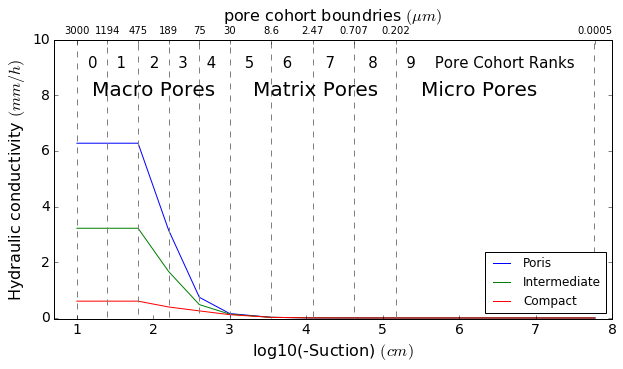

In [8]:
ymax = 10
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.plot(np.log10(-Poris.ix[:,'PsiUpper']),Poris.ix[:,'CumCapil'],label = 'Poris')
ax1.plot(np.log10(-Intermediate.ix[:,'PsiUpper']),Intermediate.ix[:,'CumCapil'],label = 'Intermediate')
ax1.plot(np.log10(-Compact.ix[:,'PsiUpper']),Compact.ix[:,'CumCapil'],label = 'Compact')
ax1.plot(BoundrySuction,BoundryMarkers,'--',color='grey')
ax1.set_xlim(0.7,8)
ax1.set_ylim(-.03,ymax)
ax1.set_xlabel(r'log10(-Suction) $(cm)$',fontsize=16)
ax1.set_ylabel(r'Hydraulic conductivity $(mm/h)$',fontsize=16)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(np.log10(-BoundPSImm))
ax2.set_xticklabels(PoreBounds)
ax2.set_xlabel(r'pore cohort boundries $(\mu m)$',fontsize=16)
ax1.tick_params(labelsize = 14)
plt.text(1.2,ymax*0.8,'Macro Pores',fontsize=20)
plt.text(3.3,ymax*0.8,'Matrix Pores',fontsize=20)
plt.text(5.5,ymax*0.8,'Micro Pores',fontsize=20)
plt.text(1.15,ymax*0.9,'0    1     2    3    4      5      6       7       8      9    Pore Cohort Ranks',fontsize=15)
ax1.legend(loc=4)

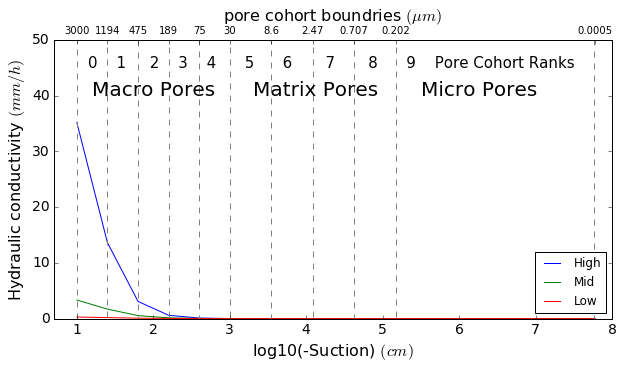

In [9]:
High =  WEIRDOFunctions.SorptionFrame(BoundPSImm,0.48,.33,.17,-15,6e-12,3.8)
Mid =  WEIRDOFunctions.SorptionFrame(BoundPSImm,0.48,.3,.15,-15,6e-12,3.4)
Low =  WEIRDOFunctions.SorptionFrame(BoundPSImm,0.48,.3,.15,-15,6e-12,3)
ymax = 50
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.plot(np.log10(-High.ix[:,'PsiUpper']),High.ix[:,'CumCapil'],label = 'High')
ax1.plot(np.log10(-Mid.ix[:,'PsiUpper']),Mid.ix[:,'CumCapil'],label = 'Mid')
ax1.plot(np.log10(-Low.ix[:,'PsiUpper']),Low.ix[:,'CumCapil'],label = 'Low')
ax1.plot(BoundrySuction,BoundryMarkers,'--',color='grey')
ax1.set_xlim(0.7,8)
ax1.set_ylim(-.03,ymax)
ax1.set_xlabel(r'log10(-Suction) $(cm)$',fontsize=16)
ax1.set_ylabel(r'Hydraulic conductivity $(mm/h)$',fontsize=16)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(np.log10(-BoundPSImm))
ax2.set_xticklabels(PoreBounds)
ax2.set_xlabel(r'pore cohort boundries $(\mu m)$',fontsize=16)
ax1.tick_params(labelsize = 14)
plt.text(1.2,ymax*0.8,'Macro Pores',fontsize=20)
plt.text(3.3,ymax*0.8,'Matrix Pores',fontsize=20)
plt.text(5.5,ymax*0.8,'Micro Pores',fontsize=20)
plt.text(1.15,ymax*0.9,'0    1     2    3    4      5      6       7       8      9    Pore Cohort Ranks',fontsize=15)
ax1.legend(loc=4)

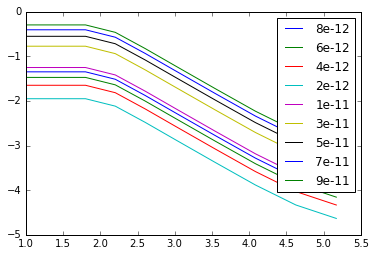

In [10]:
Cflows = [8e-12,6e-12,4e-12,2e-12,1e-11,3e-11,5e-11,7e-11,9e-11]
Xflow = 3
FitSAT = 0.45
FitDUL = 0.38
FitLL = 0.20
psibub = -100
    
Fig = plt.Figure(figsize=(18,18))
for Cflow in Cflows:
    Frame = WEIRDOFunctions.ConductivityFrame(BoundPSImm,FitSAT,FitDUL,FitLL,psibub,Cflow,Xflow)
    plt.plot(np.log10(-Frame.ix[:,'PsiUpper']),np.log10(Frame.ix[:,'Conductivity']),label = Cflow)
plt.legend()

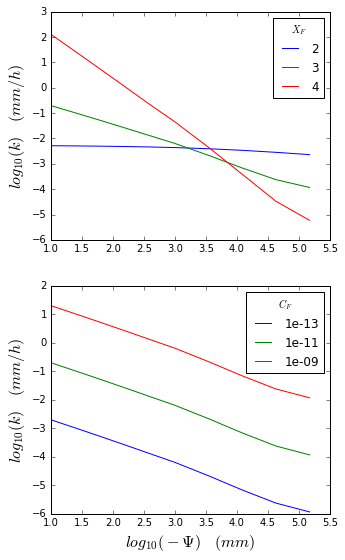

In [11]:
fig = plt.figure(figsize=(5,9))
ax1 = fig.add_subplot(2,1,1)
Cflow = 1e-11
Xflows = [2,3,4]
FitSAT = 0.45
FitDUL = 0.38
FitLL = 0.20
psibub = -10

for Xflow in Xflows:
    Frame =  WEIRDOFunctions.ConductivityFrame(BoundPSImm,FitSAT,FitDUL,FitLL,psibub,Cflow,Xflow)
    plt.plot(np.log10(-Frame.ix[:,'PsiUpper']),np.log10(Frame.ix[:,'Conductivity']),label = Xflow)
plt.legend(title=r'$X_F$')
plt.ylabel(r'$log_{10}(k) \quad (mm/h)$',fontsize=16)

ax2 = fig.add_subplot(2,1,2)
Cflows = [1e-13,1e-11,1e-9]
Xflow = 3
FitSAT = 0.45
FitDUL = 0.38
FitLL = 0.20
psibub = -10
    
Fig = plt.Figure(figsize=(18,18))
for Cflow in Cflows:
    Frame = WEIRDOFunctions.ConductivityFrame(BoundPSImm,FitSAT,FitDUL,FitLL,psibub,Cflow,Xflow)
    plt.plot(np.log10(-Frame.ix[:,'PsiUpper']),np.log10(Frame.ix[:,'Conductivity']),label = Cflow)
plt.legend()
plt.xlabel(r'$log_{10}(-\Psi) \quad (mm)$',fontsize=16)
plt.ylabel(r'$log_{10}(k) \quad (mm/h)$',fontsize=16)
plt.legend(title=r'$C_F$')

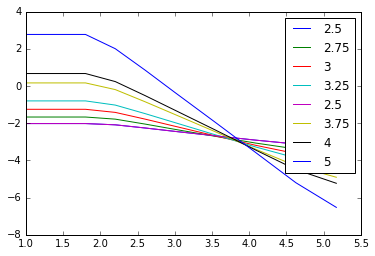

In [12]:
Cflow = 1e-11
Xflows = [2.5,2.75,3,3.25,2.5,3.75,4,5]
FitSAT = 0.45
FitDUL = 0.38
FitLL = 0.20
psibub = -100
    
Fig = plt.Figure(figsize=(18,18))
for Xflow in Xflows:
    Frame =  WEIRDOFunctions.ConductivityFrame(BoundPSImm,FitSAT,FitDUL,FitLL,psibub,Cflow,Xflow)
    plt.plot(np.log10(-Frame.ix[:,'PsiUpper']),np.log10(Frame.ix[:,'Conductivity']),label = Xflow)
plt.legend()

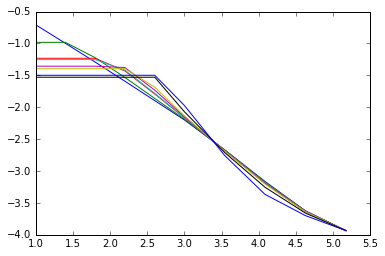

In [13]:
Cflow = 1e-11
Xflow = 3
FitSAT = 0.45
FitDUL = 0.38
FitLL = 0.20
psibubs = [-10,-30,-90,-100,-150,-200,-400,-600]
    
Fig = plt.Figure(figsize=(18,18))
for psibub in psibubs:
    Frame =  WEIRDOFunctions.ConductivityFrame(BoundPSImm,FitSAT,FitDUL,FitLL,psibub,Cflow,Xflow)
    plt.plot(np.log10(-Frame.ix[:,'PsiUpper']),np.log10(Frame.ix[:,'Conductivity']),label = 'WEIRDO fits')

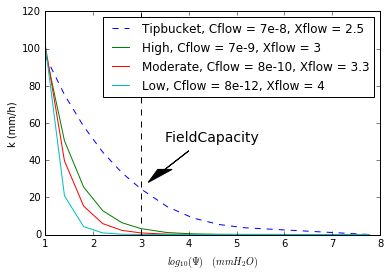

In [14]:
FitSAT = 0.45
FitDUL = 0.38
FitLL = 0.20
psibub = -10
    
Fig = plt.Figure(figsize=(18,18))

Frame =  WEIRDOFunctions.ConductivityFrame(BoundPSImm,FitSAT,FitDUL,FitLL,psibub,7e-8,2.5)
plt.plot(np.log10(-Frame.ix[:,'PsiUpper']),Frame.ix[:,'Conductivity'],'--',label = 'Tipbucket, Cflow = 7e-8, Xflow = 2.5')
Frame =  WEIRDOFunctions.ConductivityFrame(BoundPSImm,FitSAT,FitDUL,FitLL,psibub,5e-9,3)
plt.plot(np.log10(-Frame.ix[:,'PsiUpper']),Frame.ix[:,'Conductivity'],label = 'High, Cflow = 7e-9, Xflow = 3')
Frame =  WEIRDOFunctions.ConductivityFrame(BoundPSImm,FitSAT,FitDUL,FitLL,psibub,8e-10,3.3)
plt.plot(np.log10(-Frame.ix[:,'PsiUpper']),Frame.ix[:,'Conductivity'],label = 'Moderate, Cflow = 8e-10, Xflow = 3.3')
Frame =  WEIRDOFunctions.ConductivityFrame(BoundPSImm,FitSAT,FitDUL,FitLL,psibub,8e-12,4)
plt.plot(np.log10(-Frame.ix[:,'PsiUpper']),Frame.ix[:,'Conductivity'],label = 'Low, Cflow = 8e-12, Xflow = 4')
plt.legend()
plt.plot([3,3],[0,120],'--k')
plt.text(3.5,50,'FieldCapacity', fontsize=14)
plt.arrow(4,45,-0.5,-10,head_width = 0.3, head_length = 7, fc='k',ec='k')
plt.ylabel('k (mm/h)')
plt.xlabel(r'$log_{10}(\Psi) \quad (mmH_2O)$')

(-10, 3)

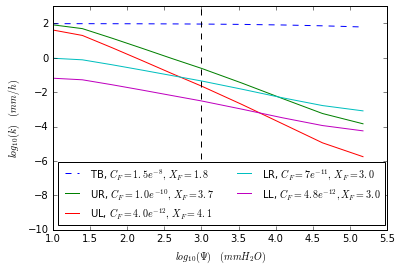

In [15]:
FitSAT = 0.45
FitDUL = 0.38
FitLL = 0.20
psibub = -20
    
Fig = plt.Figure(figsize=(18,18))

Frame =  WEIRDOFunctions.ConductivityFrame(BoundPSImm,FitSAT,FitDUL,FitLL,psibub,1.5e-7,1.8)
plt.plot(np.log10(-Frame.ix[:,'PsiUpper']),np.log10(Frame.ix[:,'Conductivity']),'--',label = r'TB, $C_F = 1.5e^{-8},\, X_F = 1.8$')
Frame =  WEIRDOFunctions.ConductivityFrame(BoundPSImm,FitSAT,FitDUL,FitLL,psibub,1e-10,3.7)
plt.plot(np.log10(-Frame.ix[:,'PsiUpper']),np.log10(Frame.ix[:,'Conductivity']),label = r'UR, $C_F = 1.0e^{-10}, \, X_F = 3.7$')
Frame =  WEIRDOFunctions.ConductivityFrame(BoundPSImm,FitSAT,FitDUL,FitLL,psibub,4e-12,4.1,)
plt.plot(np.log10(-Frame.ix[:,'PsiUpper']),np.log10(Frame.ix[:,'Conductivity']),label = r'UL, $C_F = 4.0e^{-12}, \, X_F = 4.1$')
Frame =  WEIRDOFunctions.ConductivityFrame(BoundPSImm,FitSAT,FitDUL,FitLL,psibub,7e-11,3)
plt.plot(np.log10(-Frame.ix[:,'PsiUpper']),np.log10(Frame.ix[:,'Conductivity']),label = r'LR, $C_F = 7e^{-11}, \, X_F = 3.0$')
Frame =  WEIRDOFunctions.ConductivityFrame(BoundPSImm,FitSAT,FitDUL,FitLL,psibub,4.8e-12,3)
plt.plot(np.log10(-Frame.ix[:,'PsiUpper']),np.log10(Frame.ix[:,'Conductivity']),label = r'LL, $C_F = 4.8e^{-12}, X_F = 3.0$')
plt.legend(loc=3,fontsize=10,ncol=2)
plt.plot([3,3],[-8,3],'--k')
#plt.text(3.5,50,'FieldCapacity', fontsize=14)
#plt.arrow(4,45,-0.5,-10,head_width = 0.3, head_length = 7, fc='k',ec='k')
plt.ylabel(r'$log_{10}(k) \quad (mm/h)$')
plt.xlabel(r'$log_{10}(\Psi) \quad (mmH_2O)$')
plt.ylim(-10,3)


(0, 150)

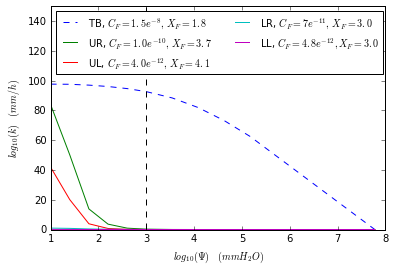

In [25]:
FitSAT = 0.45
FitDUL = 0.38
FitLL = 0.20
psibub = -20
    
Fig = plt.Figure(figsize=(18,18))

Frame =  WEIRDOFunctions.ConductivityFrame(BoundPSImm,FitSAT,FitDUL,FitLL,psibub,1.5e-7,1.8)
plt.plot(np.log10(-Frame.ix[:,'PsiUpper']),Frame.ix[:,'Conductivity'],'--',label = r'TB, $C_F = 1.5e^{-8},\, X_F = 1.8$')
Frame =  WEIRDOFunctions.ConductivityFrame(BoundPSImm,FitSAT,FitDUL,FitLL,psibub,1e-10,3.7)
plt.plot(np.log10(-Frame.ix[:,'PsiUpper']),Frame.ix[:,'Conductivity'],label = r'UR, $C_F = 1.0e^{-10}, \, X_F = 3.7$')
Frame =  WEIRDOFunctions.ConductivityFrame(BoundPSImm,FitSAT,FitDUL,FitLL,psibub,4e-12,4.1,)
plt.plot(np.log10(-Frame.ix[:,'PsiUpper']),Frame.ix[:,'Conductivity'],label = r'UL, $C_F = 4.0e^{-12}, \, X_F = 4.1$')
Frame =  WEIRDOFunctions.ConductivityFrame(BoundPSImm,FitSAT,FitDUL,FitLL,psibub,7e-11,3)
plt.plot(np.log10(-Frame.ix[:,'PsiUpper']),Frame.ix[:,'Conductivity'],label = r'LR, $C_F = 7e^{-11}, \, X_F = 3.0$')
Frame =  WEIRDOFunctions.ConductivityFrame(BoundPSImm,FitSAT,FitDUL,FitLL,psibub,4.8e-12,3)
plt.plot(np.log10(-Frame.ix[:,'PsiUpper']),Frame.ix[:,'Conductivity'],label = r'LL, $C_F = 4.8e^{-12}, X_F = 3.0$')
plt.legend(loc=2,fontsize=10,ncol=2)
plt.plot([3,3],[-8,150],'--k')
#plt.text(3.5,50,'FieldCapacity', fontsize=14)
#plt.arrow(4,45,-0.5,-10,head_width = 0.3, head_length = 7, fc='k',ec='k')
plt.ylabel(r'$log_{10}(k) \quad (mm/h)$')
plt.xlabel(r'$log_{10}(\Psi) \quad (mmH_2O)$')
plt.ylim(0,150)


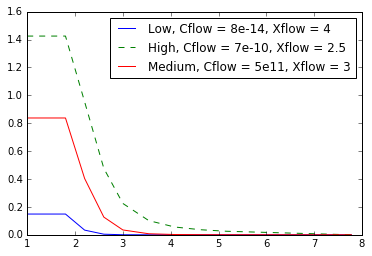

In [16]:
FitSAT = 0.46
FitDUL = 0.28
FitLL = 0.14
psibub = -70
    
Fig = plt.Figure(figsize=(18,18))
Frame =  WEIRDOFunctions.ConductivityFrame(BoundPSImm,FitSAT,FitDUL,FitLL,psibub,8e-14,4)
#plt.plot(np.log10(-Frame.ix[:,'PsiUpper']),np.log10(Frame.ix[:,'Conductivity']),label = 'WEIRDO fits')
plt.plot(np.log10(-Frame.ix[:,'PsiUpper']),Frame.ix[:,'Conductivity'],label = 'Low, Cflow = 8e-14, Xflow = 4')
Frame =  WEIRDOFunctions.ConductivityFrame(BoundPSImm,FitSAT,FitDUL,FitLL,psibub,7e-10,2.5)
plt.plot(np.log10(-Frame.ix[:,'PsiUpper']),Frame.ix[:,'Conductivity'],'--',label = 'High, Cflow = 7e-10, Xflow = 2.5')
Frame =  WEIRDOFunctions.ConductivityFrame(BoundPSImm,FitSAT,FitDUL,FitLL,psibub,5e-11,3)
plt.plot(np.log10(-Frame.ix[:,'PsiUpper']),Frame.ix[:,'Conductivity'],label = 'Medium, Cflow = 5e11, Xflow = 3')
plt.legend()

In [17]:
WEIRDOFunctions.ThetaCurve_mm_5pt(BoundPSImm,0.44,0.30,0.16,-20)

[0.44,
 0.43540600256289536,
 0.40816937920147534,
 0.37204809994849619,
 0.33362411495184108,
 0.29999999999999999,
 0.26218351515736571,
 0.22738181718961245,
 0.19391053445382717,
 0.16027181606133969,
 0.0]

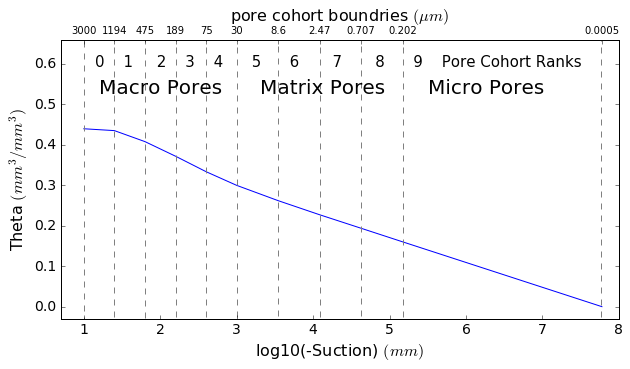

In [18]:
ymax = max(WEIRDOFunctions.ThetaCurve_mm_5pt(BoundPSImm,0.44,0.30,0.16,-20))*1.5
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.plot(np.log10(-BoundPSImm),WEIRDOFunctions.ThetaCurve_mm_5pt(BoundPSImm,0.44,0.30,0.16,-20))
#ax1.plot(np.log10([ 10, -psibub, 1000, 148510, 60000000]),[SAT,SAT,DUL,LL15,0],'o',color = 'red',markersize=12)
ax1.plot(BoundrySuction,BoundryMarkers,'--',color='grey')
ax1.set_xlim(.70,8)
ax1.set_ylim(-.03,ymax)
ax1.set_xlabel(r'log10(-Suction) $(mm)$',fontsize=16)
ax1.set_ylabel(r'Theta $(mm^3/mm^3)$',fontsize=16)
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(np.log10(-BoundPSImm))
ax2.set_xticklabels(PoreBounds)
ax2.set_xlabel(r'pore cohort boundries $(\mu m)$',fontsize=16)
ax1.tick_params(labelsize = 14)
plt.text(1.2,ymax*0.8,'Macro Pores',fontsize=20)
plt.text(3.3,ymax*0.8,'Matrix Pores',fontsize=20)
plt.text(5.5,ymax*0.8,'Micro Pores',fontsize=20)
plt.text(1.15,ymax*0.9,'0    1     2    3    4      5      6       7       8      9    Pore Cohort Ranks',fontsize=15)

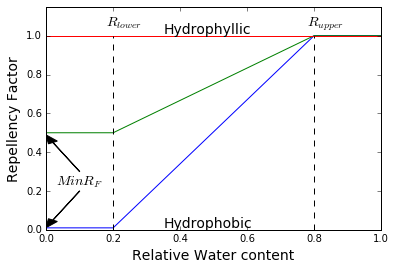

In [19]:
plt.plot([0,0.2,0.8,1],[0.01,0.01,1,1])
plt.plot([0,0.2,0.8,1],[0.5,0.5,1,1])
plt.plot([0,0.2,0.8,1],[1,1,1,1])
plt.ylim(0,1.15)
plt.ylabel('Repellency Factor',fontsize = 14)
plt.xlabel('Relative Water content',fontsize = 14)
plt.text(0.35,1.01,'Hydrophyllic',fontsize = 14)
plt.text(0.35,.01,'Hydrophobic',fontsize = 14)
plt.text(0.03,.23,r'$Min R_F$',fontsize = 14)
plt.text(0.18,1.05, r'$R_{lower}$',fontsize = 14)
plt.text(0.78,1.05, r'$R_{upper}$',fontsize = 14)
plt.arrow(0.1,0.3,-0.08,0.15,head_width=0.03,fc='k',ec='k')
plt.arrow(0.1,0.2,-0.08,-0.15,head_width=0.03,fc='k',ec='k')
plt.plot([0.2,0.2],[0,1],'--',color='k')
plt.plot([0.8,0.8],[0,1],'--',color='k')